<a href="https://colab.research.google.com/github/subhash505/datat_analytics/blob/main/lab_data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Qi.  For the given insurance dataset justify the hypothesis
1.	Does bmi of males differ significantly from that of females?
2.	Is the proportion of smokers significantly different in different genders?
                                        OR
Qi. For the given credit card (cust_seg.csv) dataset Justify this hypothesis

1.	Is there any difference between males and females in terms of credit card usage?

2.	Is there any difference between segments of customers in terms of credit card usage?


bmi of males differ significantly from that of females

let's
H0: hypothesis as u1=u2 (bmi of males are equal from that of females)

H1: hypothesis as u1!=u2 (bmi of males differ significantly from that of 
females)

In [1]:
from google.colab import files
files.upload()

Saving insurance (1).csv to insurance (1) (1).csv


{'insurance (1).csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,sou

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
import scipy.stats.distributions as dist
import scipy.stats as stats
import statistics as stats2

In [3]:
df=pd.read_csv("insurance (1).csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


visualization of characterstics


In [9]:
#create counts of data for plotting categorical variables
gender = np.unique(df['sex'], return_counts=True)
smoker = np.unique(df['smoker'], return_counts=True)
region = np.unique(df['region'], return_counts=True)



In [10]:
gender[0]

array(['female', 'male'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

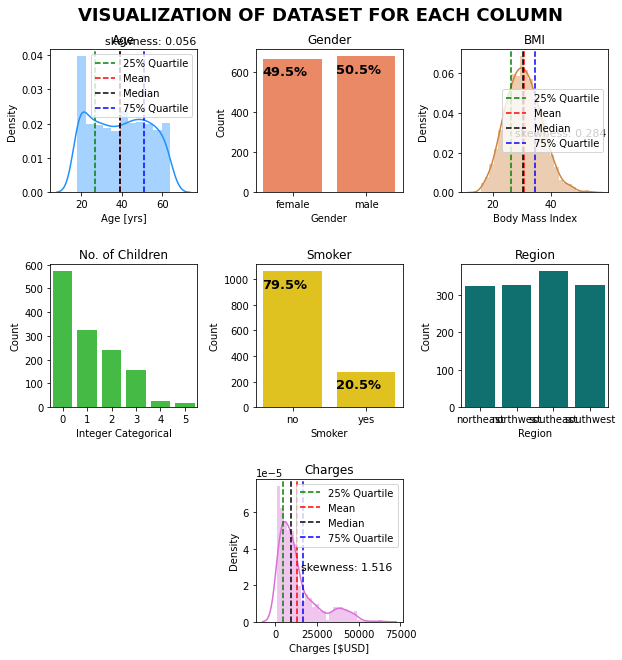

In [11]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[10,10]);
fig.suptitle("VISUALIZATION OF DATASET FOR EACH COLUMN", fontsize=18, fontweight='bold');
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);

#load plots into subplots, and set plot dataset's columns
ax0 = fig.add_subplot(3, 3, 1);
sn.distplot(df['age'], ax=ax0, color='dodgerblue');
ax0.axvline(df['age'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
ax0.axvline(df['age'].mean(),color='red',linestyle='--',label='Mean');
ax0.axvline(df['age'].median(),color='black',linestyle='--',label='Median');
ax0.axvline(df['age'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');
ax0.text(77, 0.044, 'skewness: {}' .format(str(round(df['age'].skew(),3))), ha='right', va='center', size=11)
ax0.set_title('Age');
ax0.set_xlabel('Age [yrs]');
ax0.legend(fontsize=10);

ax1 = fig.add_subplot(3, 3, 2);
sn.barplot(x=list(gender[0]), y=list(gender[1]), ax=ax1, color='coral');
ax1.text(0.2, 600, '{}%' .format(str(round(gender[1][0]/sum(gender[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax1.text(1.2, 610, '{}%' .format(str(round(gender[1][1]/sum(gender[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax1.set_title('Gender');
ax1.set_xlabel('Gender');
ax1.set_ylabel('Count');


ax2 = fig.add_subplot(3, 3, 3);
sn.distplot(df['bmi'], ax=ax2, color='peru');
ax2.axvline(df['bmi'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
ax2.axvline(df['bmi'].mean(),color='red',linestyle='--',label='Mean');
ax2.axvline(df['bmi'].median(),color='black',linestyle='--',label='Median');
ax2.axvline(df['bmi'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');
ax2.text(59, 0.03, 'skewness: {}' .format(str(round(df['bmi'].skew(),3))), ha='right', va='center', size=11)
ax2.set_title('BMI');
ax2.set_xlabel('Body Mass Index');
ax2.legend(fontsize=10);

ax3 = fig.add_subplot(3, 3, 4);
sn.countplot(df['children'], ax=ax3, color='limegreen');
ax3.set_title('No. of Children');
ax3.set_xlabel('Integer Categorical');
ax3.set_ylabel('Count');

ax4 = fig.add_subplot(3, 3, 5);
sn.barplot(x=list(smoker[0]), y=list(smoker[1]), ax=ax4, color='gold');
ax4.text(0.2, 960, '{}%' .format(str(round(smoker[1][0]/sum(smoker[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax4.text(1.2, 180, '{}%' .format(str(round(smoker[1][1]/sum(smoker[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax4.set_title('Smoker');
ax4.set_xlabel('Smoker');
ax4.set_ylabel('Count');

ax5 = fig.add_subplot(3, 3, 6);
sn.barplot(x=list(region[0]), y=list(region[1]), ax=ax5, color='teal');
ax5.set_title('Region');
ax5.set_xlabel('Region');
ax5.set_ylabel('Count');

ax6 = fig.add_subplot(3, 3, 8)
sn.distplot(df['charges'], ax=ax6, color='orchid');
ax6.axvline(df['charges'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
ax6.axvline(df['charges'].mean(),color='red',linestyle='--',label='Mean');
ax6.axvline(df['charges'].median(),color='black',linestyle='--',label='Median');
ax6.axvline(df['charges'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');
ax6.text(70000, 3e-5, 'skewness: {}' .format(str(round(df['charges'].skew(),3))), ha='right', va='center', size=11)
ax6.set_title('Charges');
ax6.set_xlabel('Charges [$USD]');
ax6.legend(fontsize=10);



Observation:

The age feature of the dataset appears to be non-skewed but platykurtic, deviating from a normal distrubtion.

Gender feature of the dataset appears to have a near 50/50 spread as would be expected.

BMI feature of the dataset appears to be normally distributed (both non-skewed and mesokurtic).

Number of children appears to be reasonably spread.

A majority of the population are non-smokers, with about 20% smokers.

There is a close to even spread of records across regions.

Charges appear to be heavily positively skewed, deviating from a normal distribution.


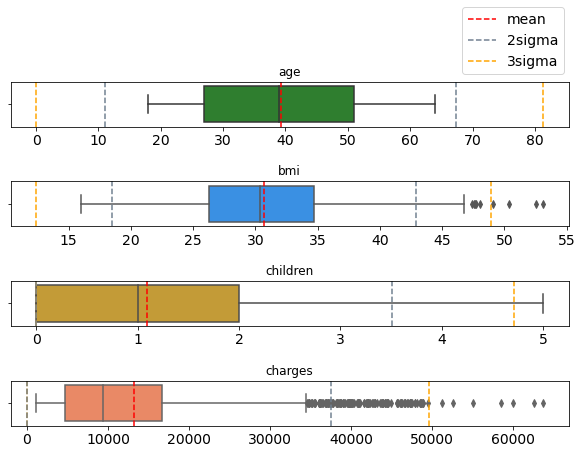

In [12]:
#create subplot layout
fig = plt.figure(figsize=[10,10]);
grid = plt.GridSpec(6, 1, wspace=0.3, hspace=1.2);
x = ['age', 'bmi', 'children', 'charges'];
col = ['forestgreen','dodgerblue','goldenrod', 'coral'];

#loop to populate boxplots within subplots
for i in np.arange(0,4):
  for j in np.arange(0,1):
    exec(f'ax{i}{j} = plt.subplot(grid[i,j]);')
    exec(f'sn.boxplot(x=df[x[{i}]], ax=ax{i}{j}, color=col[{i}]);')
    exec(f'ax{i}{j}.set_title(x[{i}]) ')
    exec(f'ax{i}{j}.set_xlabel("")')
    exec(f'a{i} = ax{i}{j}.axvline(df[x[{i}]].mean(),color= "red", linestyle="--", label="mean")')
    exec(f'b{i} = ax{i}{j}.axvline(df[x[{i}]].mean()+ 3 * df[x[{i}]].std(),color= "orange", linestyle="--", label="3sigma")')
    exec(f'ax{i}{j}.axvline(max([df[x[{i}]].mean()- 3 * df[x[{i}]].std(), 0]),color= "orange", linestyle="--")')
    exec(f'c{i} = ax{i}{j}.axvline(df[x[{i}]].mean()+ 2 * df[x[{i}]].std(),color= "slategrey", linestyle="--", label="2sigma")')
    exec(f'ax{i}{j}.axvline(max([df[x[{i}]].mean()- 2 * df[x[{i}]].std(), 0]),color= "slategrey", linestyle="--")')
    plt.xticks(fontsize=14);

plt.legend([a0, c0, b0], ['mean','2sigma','3sigma'], loc='upper center', bbox_to_anchor=(0.9, 9.4), fontsize=14)        
fig.show();

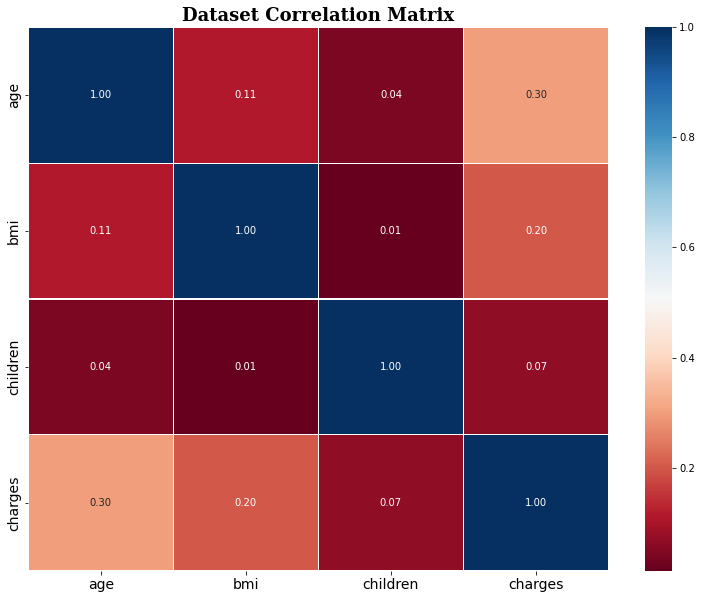

In [13]:
#plot correlation matrix heatmap
fig, ax = plt.subplots(figsize=[13,10])
sn.heatmap(df.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap="RdBu")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict={'family': 'serif', 'color': 'black', 'size': 18, 'weight': 'bold'})
fig.show();

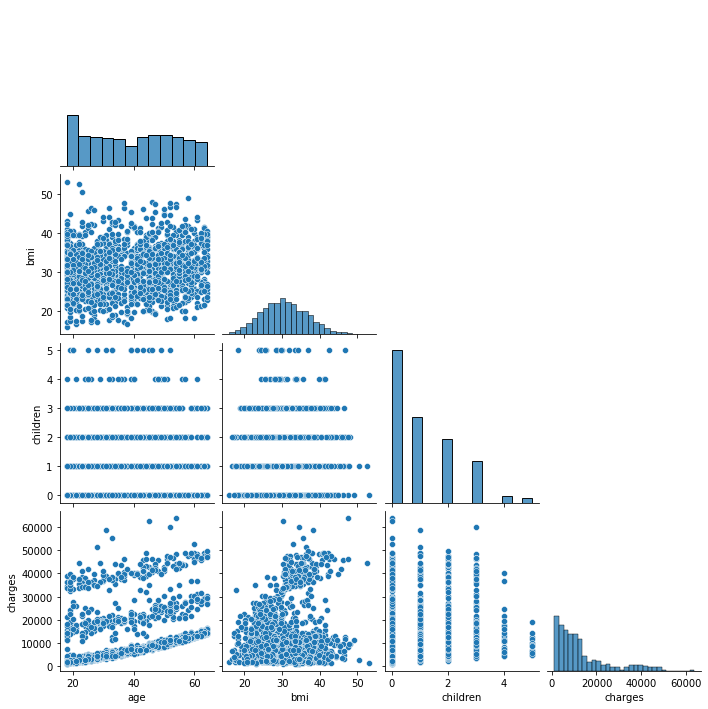

In [14]:
sn.pairplot(df, corner=True)

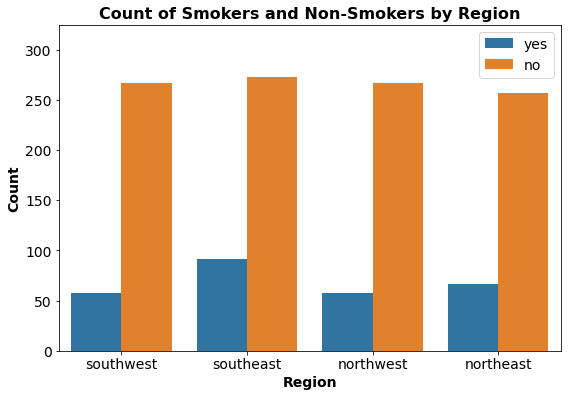

In [15]:
fig1 = plt.figure(figsize=[9,6]);
ax0 = sn.countplot(data=df, x = 'region', hue = 'smoker');
plt.xlabel('Region', fontsize='14', fontweight='bold');
plt.ylabel('Count', fontsize='14', fontweight='bold');
plt.title('Count of Smokers and Non-Smokers by Region', fontsize='16', fontweight='bold');
plt.legend(fontsize=14);
ax0.set(ylim=(0, 325));
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);


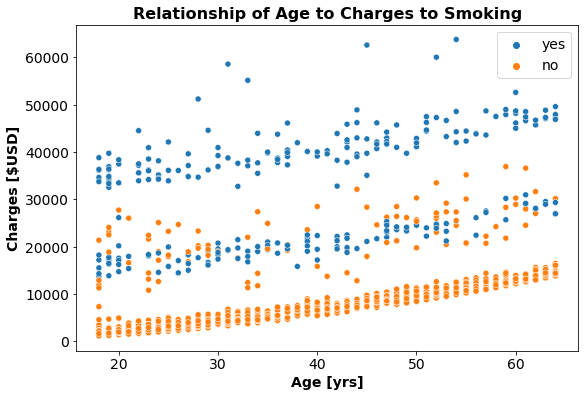

In [16]:
fig1 = plt.figure(figsize=[9,6]);
ax0 = sn.scatterplot(data=df, x = 'age', y = 'charges', hue='smoker');
plt.xlabel('Age [yrs]', fontsize='14', fontweight='bold');
plt.ylabel('Charges [$USD]', fontsize='14', fontweight='bold');
plt.title('Relationship of Age to Charges to Smoking', fontsize='16', fontweight='bold');
plt.legend(fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

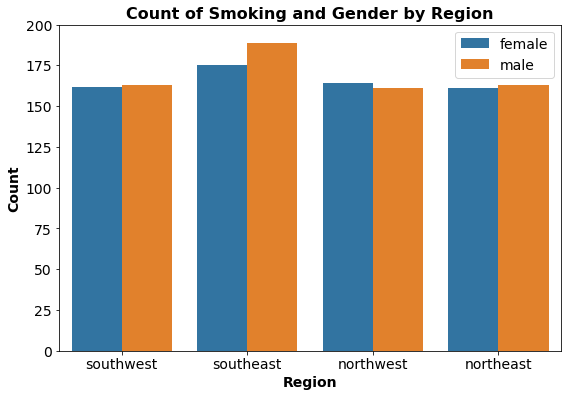

In [17]:
fig1 = plt.figure(figsize=[9,6]);
ax0 = sn.countplot(data=df, x = 'region', hue = 'sex');
plt.xlabel('Region', fontsize='14', fontweight='bold');
plt.ylabel('Count', fontsize='14', fontweight='bold');
plt.title('Count of Smoking and Gender by Region', fontsize='16', fontweight='bold');
plt.legend(fontsize=14);
ax0.set(ylim=(0, 200));
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

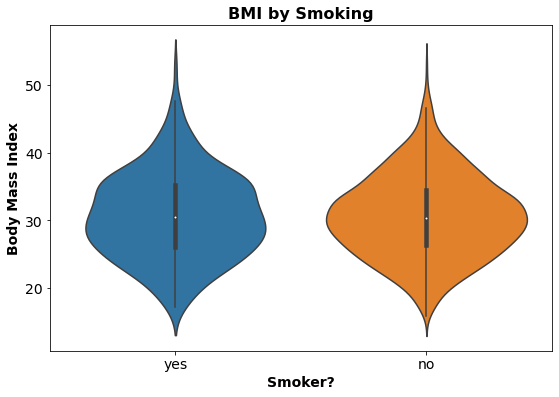

In [18]:
fig1 = plt.figure(figsize=[9,6]);
ax0 = sn.violinplot(data=df, y = 'bmi', x = 'smoker');
plt.xlabel('Smoker?', fontsize='14', fontweight='bold');
plt.ylabel('Body Mass Index', fontsize='14', fontweight='bold');
plt.title('BMI by Smoking', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

Based upon the violinplots above, it appears that smoking may lead to higher rates of obesity.

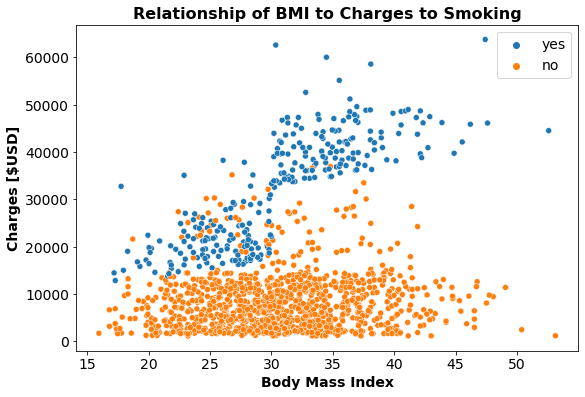

In [19]:
fig1 = plt.figure(figsize=[9,6]);
ax0 = sn.scatterplot(data=df, y = 'charges', x = 'bmi', hue='smoker');
plt.xlabel('Body Mass Index', fontsize='14', fontweight='bold');
plt.ylabel('Charges [$USD]', fontsize='14', fontweight='bold');
plt.title('Relationship of BMI to Charges to Smoking', fontsize='16', fontweight='bold');
plt.legend(fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

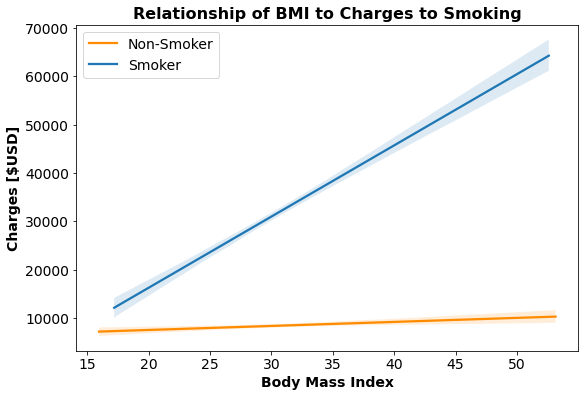

In [20]:
fig1 = plt.figure(figsize=[9,6]);
sn.regplot(y = df.loc[df['smoker']=='no','charges'], x = df.loc[df['smoker']=='no','bmi'], scatter=False, label='Non-Smoker', color='darkorange');
sn.regplot(y = df.loc[df['smoker']=='yes','charges'], x = df.loc[df['smoker']=='yes','bmi'], scatter=False, label='Smoker', color='tab:blue');
plt.xlabel('Body Mass Index', fontsize='14', fontweight='bold');
plt.ylabel('Charges [$USD]', fontsize='14', fontweight='bold');
plt.title('Relationship of BMI to Charges to Smoking', fontsize='16', fontweight='bold');
plt.legend(fontsize=14);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

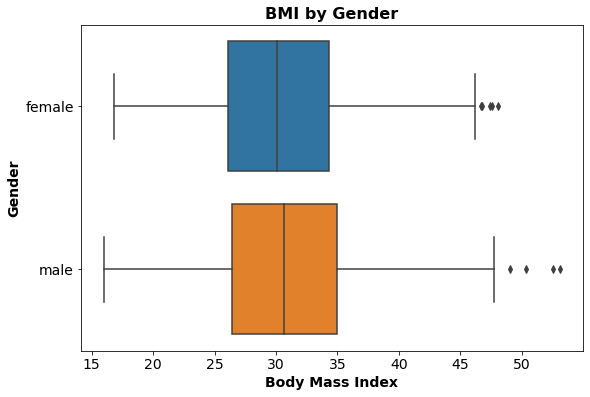

In [21]:
fig1 = plt.figure(figsize=[9,6]);
ax0 = sn.boxplot(data = df, y = 'sex', x = 'bmi');
plt.ylabel('Gender', fontsize='14', fontweight='bold');
plt.xlabel('Body Mass Index', fontsize='14', fontweight='bold');
plt.title('BMI by Gender', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

The boxplots above demonstrate a possible right-shift in the distribution of male BMI scores compared to that of females.

In [22]:
num_female = df[df.sex=="female"].shape[0]
num_male = df[df.sex=="male"].shape[0]

In [23]:
num_female

662

In [24]:
num_male

676

In [25]:
prop = df.groupby("sex")["bmi"].mean() #whole population mean.

In [26]:
prop

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

In [27]:
#This table helps us to calculate the Sdeviation.
proportion = df.groupby("sex")["bmi"].agg([lambda z: np.mean(z), "size"])
proportion.columns = ['proportions_bmi','total_counts']
proportion.head()

,proportions_bmi,total_counts
sex,,
female,30.377749,662
male,30.943129,676


In [28]:
total_proportion_bmi = (df.bmi).mean()

In [29]:
proportion.total_counts.female

662

In [30]:
proportion.total_counts.male

676

In [31]:
import math


In [32]:
#Calculating standard error
variance = total_proportion_bmi * (1 - total_proportion_bmi)
standard_deviation = np.sqrt(variance * (1 / proportion.total_counts.female + 1 / proportion.total_counts.male))
print("Sample Standard deviation",standard_deviation)

Sample Standard deviation nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
variance * (1 / proportion.total_counts.female + 1 / proportion.total_counts.male)

-2.719521985195332

In [34]:
# Calculate the test statistic 
estimate = (proportion.proportions_bmi.female - proportion.proportions_bmi.male)
print("The best estimate is",estimate)
hypothesized_estimate = 0
test_stat = (estimate-hypothesized_estimate) / standard_deviation
print("Computed Test Statistic is",test_stat)

The best estimate is -0.5653794535118628
Computed Test Statistic is nan


In [35]:
# Calculate the  p-value
pvalue = 2*dist.norm.cdf(-np.abs(test_stat)) # Multiplied by two indicates a two tailed testing.
print("Computed P-value is", pvalue)

Computed P-value is nan


so here we conclude that p value os extremly low(in negative or in complex number) that the null hypothesis should be rejected for this sample of propotion.
which means that difference between  proportions of bmi females to that of bmi males is not equals to zero.
so u1!=u2.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


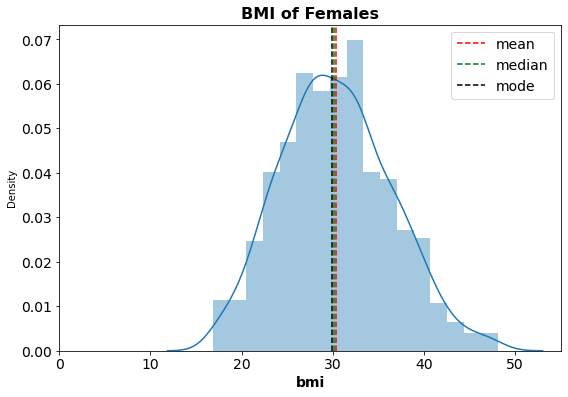

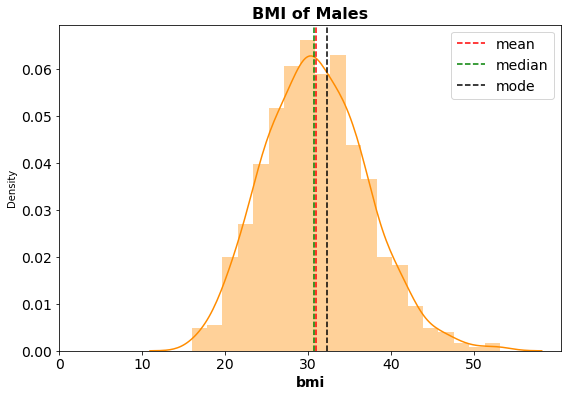

In [37]:
# get needed data
x1 = df.loc[df['sex'] == 'female', 'bmi']     # BMI of females
x2 = df.loc[df['sex'] == 'male', 'bmi']       # BMI of males

# reset index
x1.reset_index(drop=True, inplace=True)
x2.reset_index(drop=True, inplace=True)

#histogram of bmi for females
fig1 = plt.figure(figsize=[9,6]);
ax0 = sn.distplot(x1, color='tab:blue');
ax0.axvline(np.mean(x1),color='red',linestyle='--', label='mean')
ax0.axvline(np.median(x1),color='green',linestyle='--', label='median')
ax0.axvline(stats2.mode(x1),color='black',linestyle='--', label='mode')
plt.xlabel('bmi', fontsize='14', fontweight='bold');
plt.title('BMI of Females', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(fontsize=14);
ax0.set_xticks(np.arange(0,60,10));

#histogram of bmi for males
fig2 = plt.figure(figsize=[9,6]);
ax1 = sn.distplot(x2, color='darkorange');
ax1.axvline(np.mean(x2),color='red',linestyle='--', label='mean')
ax1.axvline(np.median(x2),color='green',linestyle='--', label='median')
ax1.axvline(stats2.mode(x2),color='black',linestyle='--', label='mode')
plt.xlabel('bmi', fontsize='14', fontweight='bold');
plt.title('BMI of Males', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(fontsize=14);
ax1.set_xticks(np.arange(0,60,10));

2nd part.

Is the proportion of smokers significantly different in different genders?

H 0 :  μ1   =   μ2 

H a :  μ1  != μ2 


Where:

μ1  = Claims by male smokers
μ2  = Claims by female smokers

α  = 0.05     (95% Confidence Interval)

In [38]:
#create counts of data for plotting categorical variables
gender = np.unique(df['sex'], return_counts=True)
smoker = np.unique(df['smoker'], return_counts=True)
region = np.unique(df['region'], return_counts=True)
print('gender = {}\n'.format(gender))
print('smoker = {}\n'.format(smoker))
print('region = {}\n'.format(region))

gender = (array(['female', 'male'], dtype=object), array([662, 676]))

smoker = (array(['no', 'yes'], dtype=object), array([1064,  274]))

region = (array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object), array([324, 325, 364, 325]))



In [39]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# df['sex']=le.fit_transform(df['sex'])

In [41]:
x1 = df.loc[df['smoker'] == 'yes', 'sex'] 
x1

0       female
11      female
14        male
19        male
23      female
         ...  
1313    female
1314    female
1321      male
1323    female
1337    female
Name: sex, Length: 274, dtype: object

In [43]:
#get data in correct form to create a pandas crosstab
sex = []
smoke = []
for i in np.arange(0,len(df)):
    if df.loc[i,'sex'] == 'female':
        sex.append('female')
        if df.loc[i,'smoker'] == 'yes':
            smoke.append('smoker')
        else:
            smoke.append('non-smoker')
    if df.loc[i,'sex'] == 'male':
        sex.append('male')
        if df.loc[i,'smoker'] == 'yes':
            smoke.append('smoker')
        else:
            smoke.append('non-smoker')      
ct = pd.DataFrame()
ct['sex'] = sex
ct['smoke'] = smoke

#create pandas crosstab
cross = pd.crosstab(ct.sex, ct.smoke)
cross

smoke,non-smoker,smoker
sex,,
female,547,115
male,517,159


In [44]:
# Chi-square test of independence.
c, p, dof, expected = stats.chi2_contingency(cross)

#contingency
print('statistic = {}  |  p-value = {}  |  DOF = {}\n\nExpected Values:\n{}'.format(np.round(c, 4), np.round(p, 4), np.round(dof, 0), expected))

statistic = 7.3929  |  p-value = 0.0065  |  DOF = 1

Expected Values:
[[526.43348281 135.56651719]
 [537.56651719 138.43348281]]


Here, we  reject the Null Hypothesis (p-value = 0.0065) and conclude that there is no relationship between male smoker and female smokers.